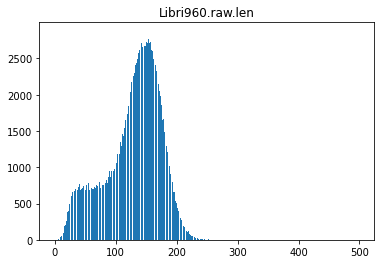

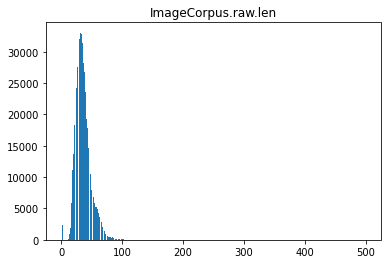

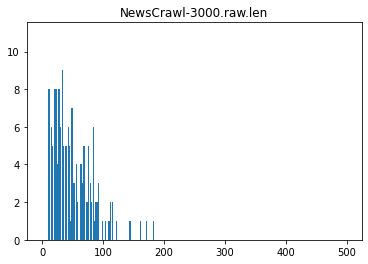

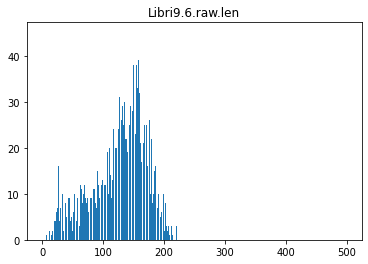

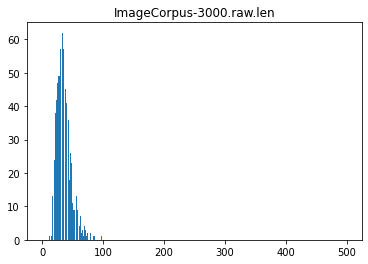

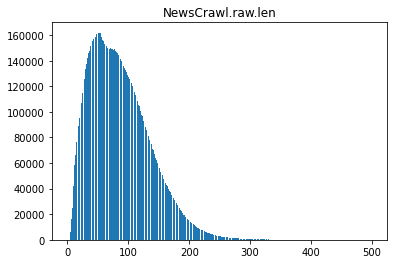

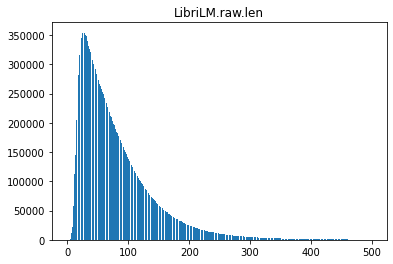

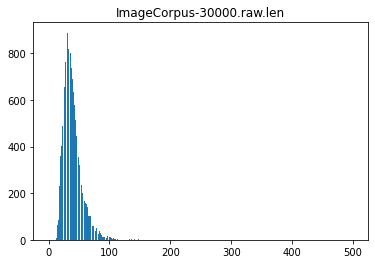

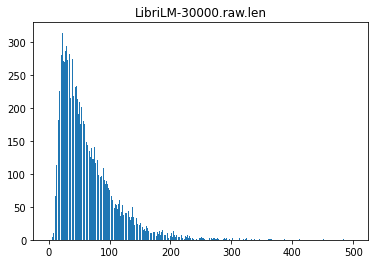

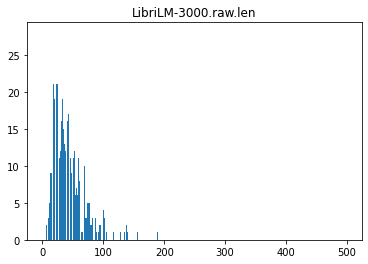

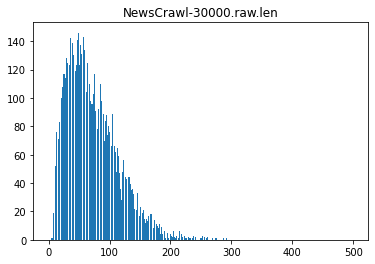

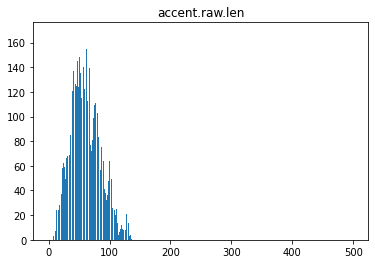

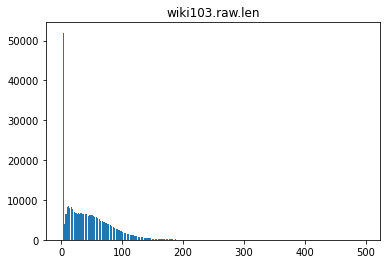

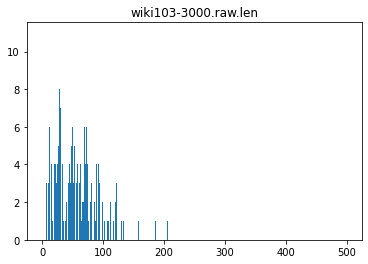

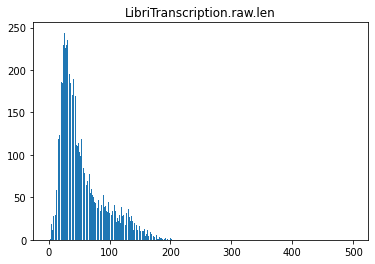

<Figure size 432x288 with 0 Axes>

In [3]:
import os
from collections import Counter
_data_path = "./data/ngrams"
from matplotlib import pyplot as plt
corpus2dist = {}

for p in os.listdir(_data_path):
    if p.endswith("len"):
        corpus2dist[p] = [list(range(500)),[0] * 500]
        with open(os.path.join(_data_path,p),"r") as f:
            data = f.readlines()
        l2c = [0] * 500
        for d in data:
            l,c = [int(x) for x in d.strip().split()]
            if l < 500:
                try:
                    l2c[l] = c
                except:
                    l2c += [0] * (l-len(l2c)+1)
                    l2c[l] = c
        plt.bar(range(len(l2c)),l2c)
        corpus2dist[p][0] = range(len(l2c))
        corpus2dist[p][1] = l2c
        plt.title(p)
        plt.show()
        plt.clf()
#print(corpus2dist)


In [2]:
print(corpus2dist.keys())

dict_keys(['Libri960.raw.len', 'ImageCorpus.raw.len', 'NewsCrawl-3000.raw.len', 'Libri9.6.raw.len', 'ImageCorpus-3000.raw.len', 'NewsCrawl.raw.len', 'LibriLM.raw.len', 'ImageCorpus-30000.raw.len', 'LibriLM-30000.raw.len', 'LibriLM-3000.raw.len', 'NewsCrawl-30000.raw.len', 'accent.raw.len', 'wiki103.raw.len', 'wiki103-3000.raw.len', 'LibriTranscription.raw.len'])


In [4]:
from scipy.stats import wasserstein_distance as wsd
target = "Libri960.raw.len"
for k in corpus2dist.keys():
    #if k == target:
        #continue
    val = wsd(corpus2dist[target][0],corpus2dist[k][0],corpus2dist[target][1],corpus2dist[k][1])
    print(k,val)

        
    

ImageCorpus.raw.len 19.407467417618495
NewsCrawl-3000.raw.len 6.7546318289786225
ImageCorpus-3000.raw.len 19.77092636579572
NewsCrawl.raw.len 32.31968346783374
LibriLM.raw.len 26.182347374014924
LibriLM-3000.raw.len 12.671230826232593
NewsCrawl-30000.raw.len 17.436391014124716
wiki103.raw.len 6.8689520109598
wiki103-3000.raw.len 5.7607336125942625
LibriTranscription.raw.len 0.0


In [5]:
print("---")
for k in corpus2dist.keys():
    #if k == target:
        #continue
    tgt_tot = sum(corpus2dist[target][1])
    other_tot = sum(corpus2dist[k][1])
    print(tgt_tot,other_tot)
    norm_tgt = [x/tgt_tot for x in corpus2dist[target][1]]
    norm_other = [x/other_tot for x in corpus2dist[k][1]]
    val = wsd(corpus2dist[target][0],corpus2dist[k][0],norm_tgt,norm_other)
    print(k,val)

---
10946 832550
ImageCorpus.raw.len 19.407467417618395
10946 390
NewsCrawl-3000.raw.len 6.754631828978584
10946 1450
ImageCorpus-3000.raw.len 19.770926365795635
10946 19171897
NewsCrawl.raw.len 32.31968346784271
10946 30259122
LibriLM.raw.len 26.182347374042806
10946 827
LibriLM-3000.raw.len 12.671230826232623
10946 12805
NewsCrawl-30000.raw.len 17.436391014124876
10946 624867
wiki103.raw.len 6.868952010960012
10946 405
wiki103-3000.raw.len 5.76073361259427
10946 10946
LibriTranscription.raw.len 0.0
